# Water age in the Terminos lagoon. Mexico

 Jose-Gilberto Cardoso-Mohedano<sup>2,*</sup>, 
 
Lalo
Marisol
María- Eugenia Allende-Arandía 
Carlos 
 
 Joan Albert Sanchez-Cabeza<sup>3</sup>,
 
Ana Carolina Ruiz-Fernández<sup> 3 </sup>, Mario Alejandro Gómez-Ponce <sup>2</sup> ,



<sup> 1 </sup> Posgrado en Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México; Avenida Ciudad Universitaria 3000, C.P. 04510, Coyoacán, Ciudad de México, México

<sup> 2 </sup>  Estación el Carmen, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Carretera Carmen-Puerto Real km. 9.5, 24157 Ciudad del Carmen, Campeche, México

<sup> 3 </sup>  Unidad Académica Mazatlán, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Calzada Joel Montes Camarena s/n, Colonia Playa Sur, Mazatlán 82000, Sinaloa, México



 \*Corresponding Author: gcardoso@cmarl.unam.mx Phone:+52-938-38-31847

[doi:XXXXX](https://XXXX)

In [35]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gsw as gsw
import matplotlib.dates as mdates

In [36]:
# set up the plotting environment
def makePretryGraphs():
    plt.rcParams["xtick.labelsize"] = 18
    plt.rcParams["ytick.labelsize"] = 18
    sns.set_style("ticks")
    sns.despine(top=False, right=False)

In [57]:
# read in the csv file
def read_csv_file(filename):
    # read in the csv file
    df = pd.read_csv(filename, sep=",", header=0, decimal=".", encoding="utf-8") 
    return df

In [58]:
# read salinity and temperature data from csv file 
sal_temp_terminos_rivers_file = "..\data\salinity_terminos_marina_delft3d.csv"

In [59]:
sal_temp_terminos_rivers_rawdata = read_csv_file(sal_temp_terminos_rivers_file)

In [60]:
# print the column names
for col in sal_temp_terminos_rivers_rawdata.columns:
    print(col)

Time_model
Salinity_psu_model
Temperature_C_model
Time _2016_data
Date_GMT_00
Conductivity_microsiemens_cm
Temp_C
Year_2016
Date_GMT_00.1
Conductivity_microsiemens_cm.1
Temp_C.1
Year_2017
Date_GMT_00.2
Conductivity_microsiemens_cm.2
Temp_C.2
Year_2018
Conductivity_microsiemens_cm_average
Conductivity_microsiemens_cm_std
Temp_C_average
Temp_C_std


In [63]:
# select the columns of interest
terminos_rivers_sal_temp = sal_temp_terminos_rivers_rawdata.copy()[
    [
        "Time_model",
        "Salinity_psu_model",
        "Temperature_C_model",
        "Conductivity_microsiemens_cm_average",
        "Temp_C_average",
    ]
]

In [68]:
# set time as index
terminos_rivers_sal_temp["Time_model"] = pd.to_datetime(
    terminos_rivers_sal_temp["Time_model"], format="%d/%m/%Y %H:%M"
    )

terminos_rivers_sal_temp = terminos_rivers_sal_temp.set_index(
    terminos_rivers_sal_temp["Time_model"]
    )

In [71]:
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

In [82]:
# %% Calculate salinity from hobo conductivity

terminos_rivers_sal_temp["sea_level_preasure"] = 0

terminos_rivers_sal_temp["salinity_psu"] = gsw.conversions.SP_from_C(
    terminos_rivers_sal_temp["Conductivity_microsiemens_cm_average"] / 1000,
    terminos_rivers_sal_temp["Temp_C_average"],
    terminos_rivers_sal_temp["sea_level_preasure"],


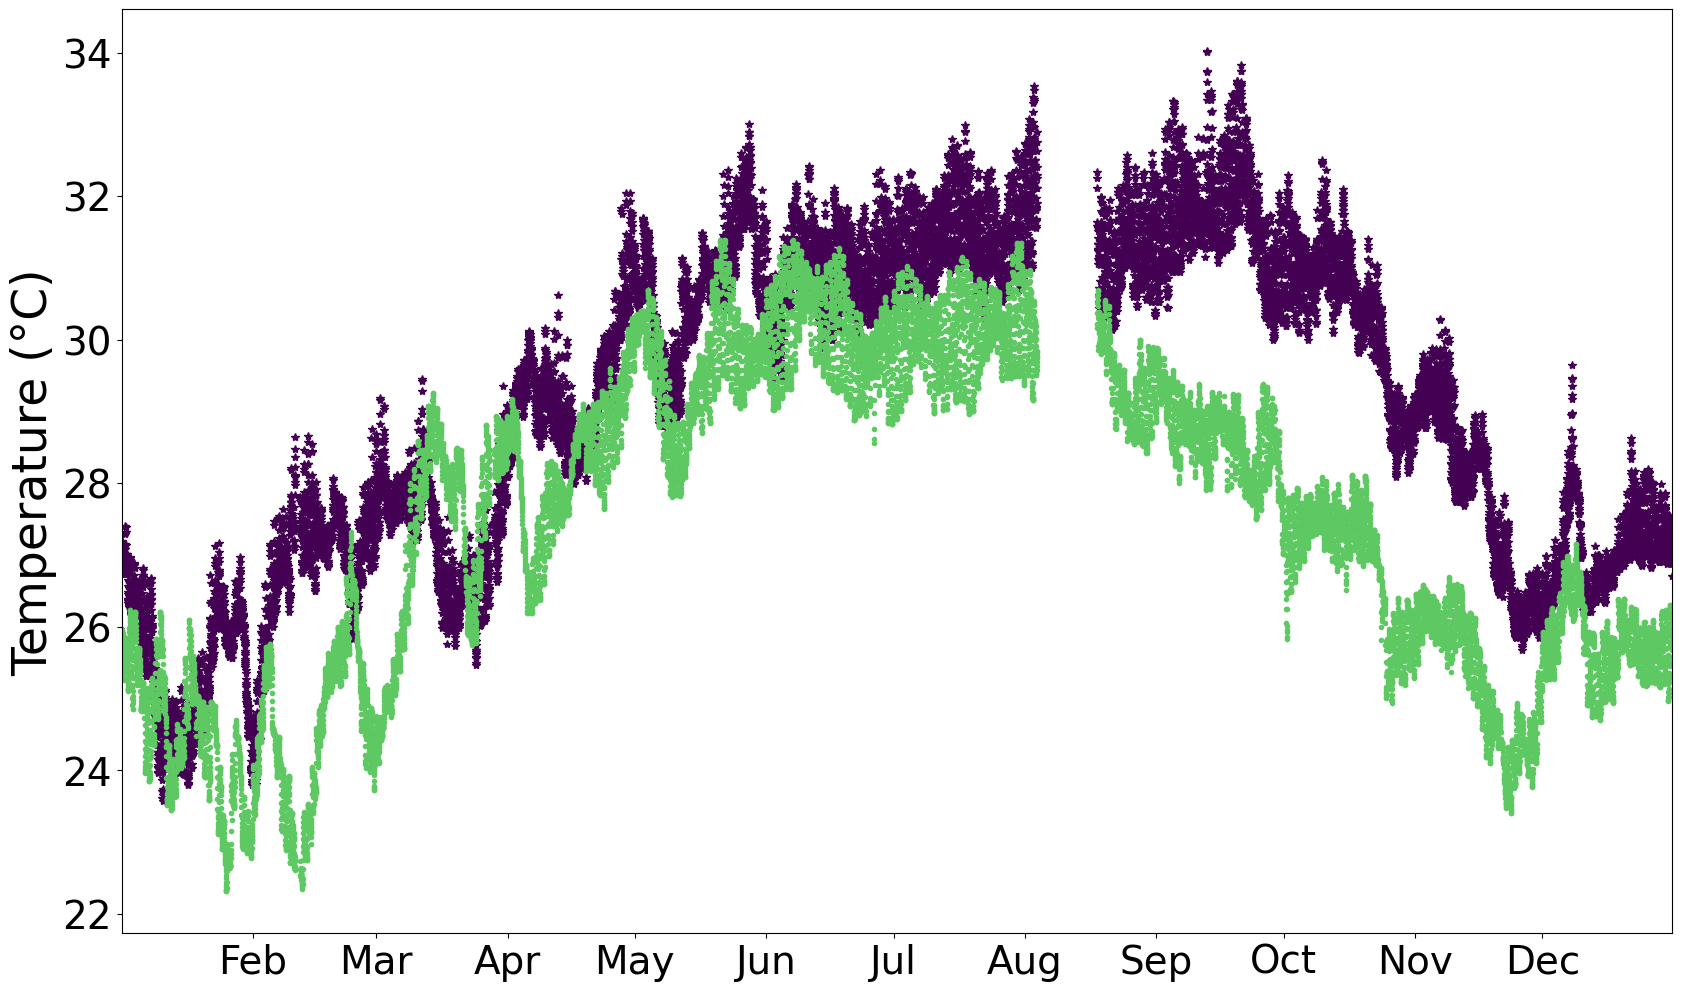

In [94]:
plt.figure(figsize=(20, 12))

plt.plot_date(terminos_rivers_sal_temp["Time_model"], terminos_rivers_sal_temp["Temp_C_average"], "*", color="#440154")
plt.plot_date(terminos_rivers_sal_temp["Time_model"], terminos_rivers_sal_temp["Temperature_C_model"], ".", color="#5ec962")

plt.xlim(min(terminos_rivers_sal_temp["Time_model"]), max(terminos_rivers_sal_temp["Time_model"]))
plt.xticks(size=28)
plt.yticks(size=28)
plt.ylabel("Temperature (°C)", size=34)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.rc("pdf", fonttype=42)

plt.savefig("../outfiles/temperatureModelDataSMAR.pdf")
